## Experimento do Efeito Termiônico

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def exp(V_):
    e0 = 8.854*10**(-12)
    e = 1.602*10**(-19)
    m = 9.1*10**(-31)
    d = 1.8*10**(-2)
    return (4)* e0 * np.sqrt(2*e/m)*(V_**(3/2))/(9*(d**2))

In [74]:
def plot_Vi(V,I,I_sat):
    fig, axs = plt.subplots(figsize = (10,6))

    Ifit = exp(V)


    axs.set_ylabel('I(A)',fontsize = 20)
    axs.set_xlabel('V(V)',fontsize = 20)


    axs.plot(V, I,'D-', markersize = 7, linewidth = 2, color = 'gray', label = 'data')
    axs.plot(V[:], (1.2*10**(-2))**2*np.pi*Ifit[:], color = 'midnightblue', label ='fit')
    axs.hlines(I_sat, 0,250, linestyle = '--' ,color = 'black', linewidth = 2, label ='$I_{sat} = $'+str(I_sat)+'A')
    axs.legend(fontsize = 15, loc = 'lower right')

    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    plt.xlim(0,250)
    #axs.plot(np.arange(0,500,2), exp(np.arange(0,500,2)))
    axs.set_yscale('log')

### $T = 1892ºC$ $i_f = 2,815$ $V_f = 6,348$

In [67]:
V = [5,10.4,15.5,20.2,24.4,30,40.5,60.1,80.1,100.3,
     120.4,140.2,160.3,182.2,207.5,259.1,303.8,352.1,
     402.5,449,500.4,525.1]
I = [2,9,16,24,39,51,76,122,156,174,188,191,194,194,194,197,197,200,201,203,204,205]

V = np.array(V); I = 10**(-5)*np.array(I);

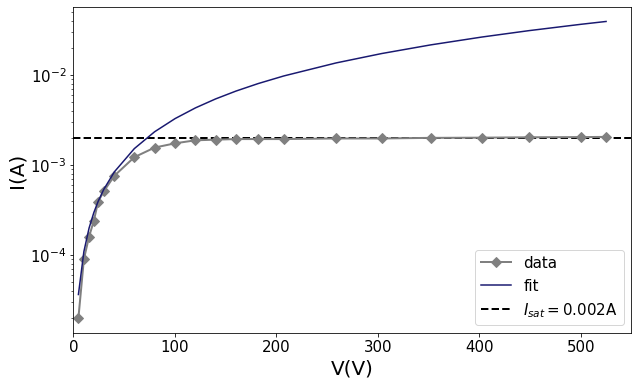

In [68]:
plot_Vi(V,I, 200e-5)

### $T = 2002ºC$ $i_f = 3,085$ $V_f = 7,251$

In [69]:
V = [5,12.1,21.5,25.2,30.8,35.3,40.1,45.3,52.1,59.8,65.7,71.2,80,90.1,100.2,110.3,121,139.7,
      160.2,180.8,199.8,220.5,240.5,259.6,280.6,299.6,350.8,400.2,452.1,499.8,519.8,552,558.6]
I = [3,13,32,41,56,70,85,103,127,159,182,204,239,282,328,370,412,489,559,617,665,700,726,744,
      759,768,782,791,803,810,812,816,817]

V = np.array(V); I = 10**(-5)*np.array(I);

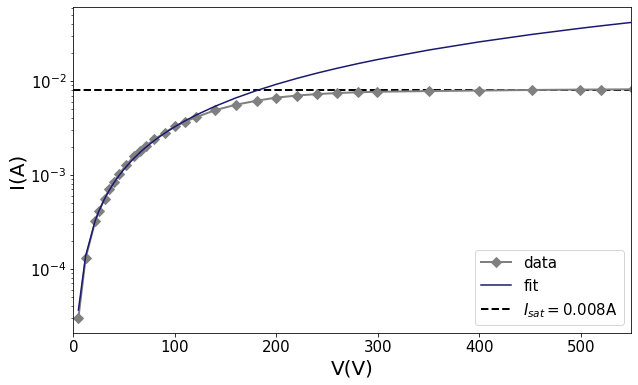

In [70]:
plot_Vi(V,I,800e-5)

### $T = 1695ºC$ $i_f = 2,637$ $V_f = 4,953$

In [80]:
V = sorted([10.9,20,40.7,61.4,80.6,240,5.7,15.7,25,30,35])
I = sorted([4,7,9,10,10,11,1,6,8,9,9])

V = np.array(V); I = 10**(-5)*np.array(I);

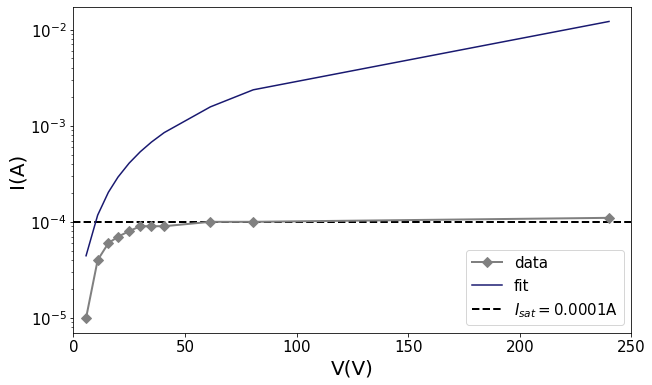

In [81]:
plot_Vi(V,I,10e-5)

### $T = 1793ºC$ $i_f = 2,587$ $V_f = 5,621$

In [82]:
V = np.array([5,10.9,15.5,20.2,25.5,30.3,35,40,45,51.3,60.8,80.8,102.1,124.8,145.1,166.6,186.7,199,214,260,207.6,452.1,506.7])
I = np.array([3,11,17,19,26,31,36,39,41,42,45,46,47,47,48,48,48,48,49,50,50,51,51])

I = 10**(-5)*I;

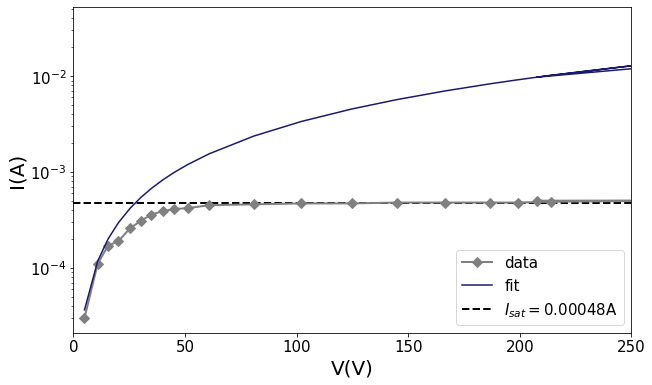

In [83]:
plot_Vi(V,I, 48e-5)

### $T = 1630ºC$ $i_f = 2,222A$ $V_f = 4,516V$

In [84]:
V = np.array([1.015,11.4,15.5,20.99,40.7,60.23,80,100,120.5,139.95,160.11,180.64,200,250,301,350,401,448,505.4])
I = np.array([0.1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])

I = 10**(-5)*I;

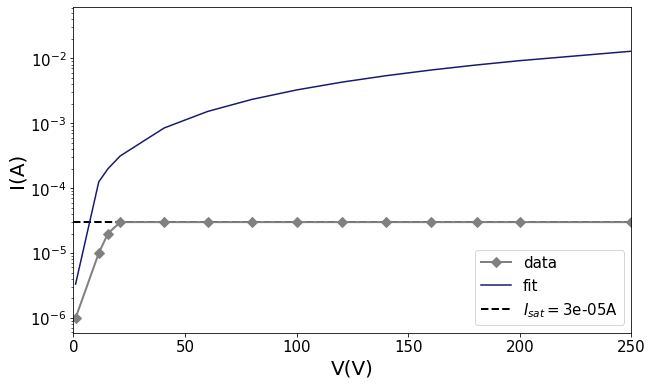

In [85]:
plot_Vi(V,I,3e-5)

## Curva $I_{ca}\times I_{bh}$  

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
def B(I):
    N = 154
    R = 20*10**(-2)
    mi0 = 4*np.pi*10**(-7)
    return 0.716*mi0*N*I/R

In [177]:
def piece_wise(I_bh, I, n, I_corte,I_min,I_max):
    x1,y1 = I_bh[:n],I[:n]
    x2,y2 = I_bh[n:],I[n:] 

    reg1 = LinearRegression().fit(x1.reshape(-1,1), y1)
    reg2 = LinearRegression().fit(x2.reshape(-1,1), y2)

    x1int = np.linspace(x1[0],x1[-1]+0.5,10)
    x2int = np.linspace(x2[0]-0.25,x2[-1],10)

    f1 = reg1.coef_*x1int + reg1.intercept_
    f2 = reg2.coef_*x2int + reg2.intercept_

    fig,axs = plt.subplots(figsize = (10,6))

    axs.plot(I_bh, I, 'D-', label='data', color = 'blue')
    axs.plot(x1int, f1, label='f',linewidth = 3, color = 'gray')
    axs.plot(x2int, f2, linewidth = 3, color = 'gray')
    
    axs.vlines(I_corte, I_min, I_max,linestyle = '--',linewidth = 3,color = 'black', label = r'$I_{corte} = $'+str(I_corte))
    plt.ylim(I_min,I_max + .02)
    axs.set_xlabel(r'$I_{bh}(A)$', fontsize = 20)
    axs.set_ylabel(r'$I_{ca}(mA)$', fontsize = 20)

    axs.legend(fontsize = 15)
    axs.grid(True)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()


### V = 50 e T = 1851

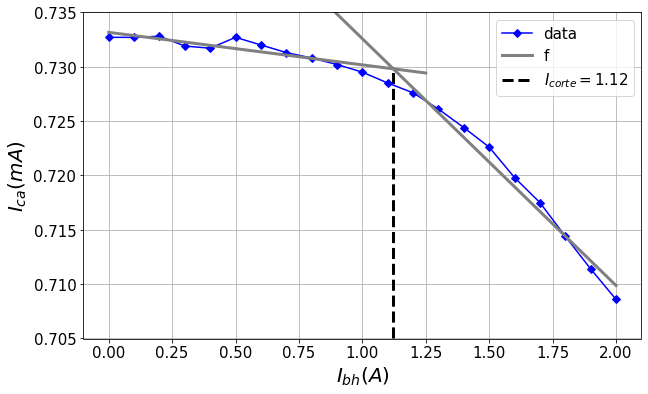

In [131]:
# V = 50 e T = 1851
I_bh = np.linspace(0,2,21)
I = np.array([0.7327,0.7327,0.7328,0.7319,0.7317,
                 0.7327,0.7320,0.7313,0.7308,0.7302,
                 0.7295,0.7285,0.7276,0.7261,0.7244,
                 0.7226,0.7198,0.7175,0.7144,0.7114,
                 0.7086])

n =11
I_corte = 1.12
piece_wise(I_bh,I,n,I_corte,I_min = 0.705, I_max = 0.730)

In [132]:
## Valores de corrente de corte

Is = np.array([1.12,1.19,1.25,1.06,1,1.35])
Is.std()

0.11710631447060782

In [125]:
I_corte = Is.mean()
deltaI = Is.std(ddof = 1)
V = 50; d= 0.03;deltaV = 0.1;deltaB = B(deltaI); deltaD = 5e-5
T = 1851
em = 2*V/((B(I_corte)*0.03)**2)
delta_em = 2*V*deltaV/(B(I_corte)**2 * d**2) + 4*V*deltaB/(B(I_corte)**3 * d**2) + 4*V*deltaD/(B(I_corte)**2 * d**3)
print('T = ', T)
print('V = ', V)
print('I_corte = ',I_corte,'+-',deltaI)
print('e/m = ', em)
print('delta e/m = ', delta_em)

T =  1851
V =  50
I_corte =  1.1616666666666668 +- 0.12828354012369111
e/m =  171540713497.44553
delta e/m =  55612559529.15313


### V = 69.1 T = 1810

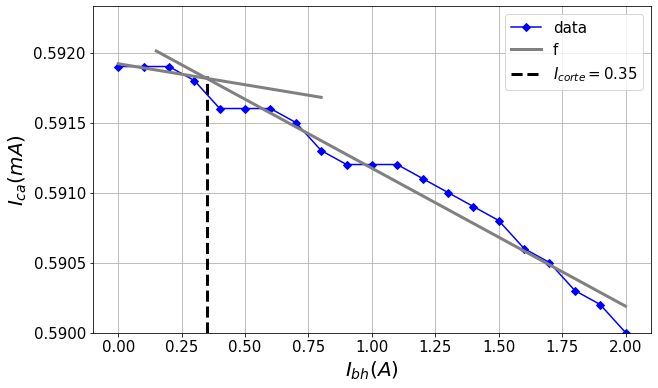

In [150]:
# V = 69.1 T = 1810

I_bh = np.linspace(0,2,21)
I = np.array([0.5919,0.5919,0.5919,0.5918,0.5916,
                 0.5916,0.5916,0.5915,0.5913,0.5912,
                 0.5912,0.5912,0.5911,0.5910,0.5909,
                 0.5908,0.5906,0.5905,0.5903,0.5902,
                 0.5900])


n = 4
I_corte = 0.35
piece_wise(I_bh,I,n, I_corte, I_min = 0.590, I_max = 0.59183)

In [148]:
Is = np.array([0.35,0.9,0.8,0.8,0.8])

In [151]:
I_corte = Is.mean()
deltaI = Is.std(ddof = 1)
V = 69.1
T = 1810
d= 0.03;deltaV = 0.1;deltaB = B(deltaI); deltaD = 5e-5
em = 2*V/((B(I_corte)*0.03)**2)
delta_em = 2*V*deltaV/(B(I_corte)**2 * d**2) + 4*V*deltaB/(B(I_corte)**3 * d**2) + 4*V*deltaD/(B(I_corte)**2 * d**3)
print('T = ', T)
print('V = ', V)
print('I_corte = ',I_corte,'+-',deltaI)
print('e/m = ', em)
print('delta e/m = ', delta_em)

T =  1810
V =  69.1
I_corte =  0.7299999999999999 +- 0.216794833886788
e/m =  600333516149.4242
delta e/m =  418607627473.2099


### V = 53.3 e T = 1900 ºC

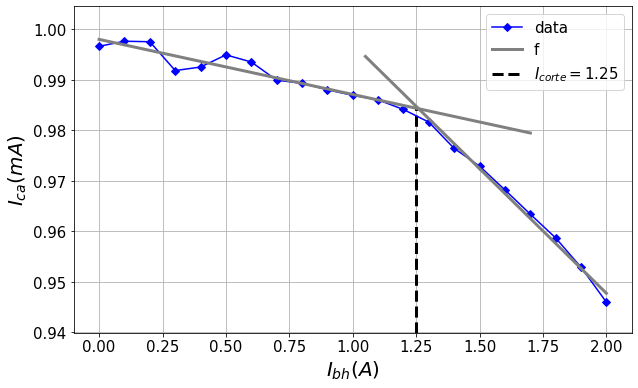

In [178]:
# V = 53.3 e T = 1900 ºC

I_bh = np.linspace(0,2,21)
I = np.array([0.9966,0.9976,0.9975,0.9918,0.9925,
                0.9949,0.9935,0.9899,0.9893,0.9880,
                0.9869,0.9860,0.9841,0.9816,0.9764,
                0.9729,0.9682,0.9634,0.9587,0.9529,
                0.9460])


n = 13
I_corte = 1.25
piece_wise(I_bh,I,n,I_corte, I_min = 0.94, I_max = 0.9845)

In [179]:
Is = np.array([1.26,1.35,1.41,1.22,1.18,1.12])

In [180]:
I_corte = Is.mean()
deltaI = Is.std(ddof = 1)
V = 53.3
T = 1900
d= 0.03;deltaV = 0.1;deltaB = B(deltaI); deltaD = 5e-5
em = 2*V/((B(I_corte)*0.03)**2)
delta_em = 2*V*deltaV/(B(I_corte)**2 * d**2) + 4*V*deltaB/(B(I_corte)**3 * d**2) + 4*V*deltaD/(B(I_corte)**2 * d**3)
print('T = ', T)
print('V = ', V)
print('I_corte = ',I_corte,'+-',deltaI)
print('e/m = ', em)
print('delta e/m = ', delta_em)

T =  1900
V =  53.3
I_corte =  1.2566666666666666 +- 0.10782702196883052
e/m =  156259806175.007
delta e/m =  42962278287.862854


(array([-0.005,  0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,
         0.035]),
 <a list of 9 Text yticklabel objects>)

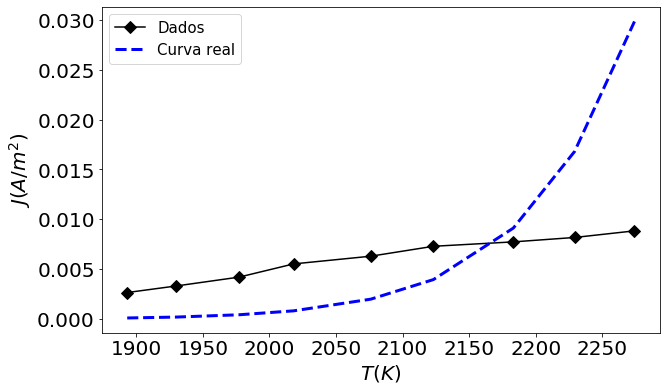

In [198]:
import numpy as np
import matplotlib.pyplot as plt

def func(T):
    kb = 1.381*10**(-23)
    A0 = 1.25*10**(6)
    W0 = 5.2* (1.6*10**(-19))
    j = T**(2) * A0 * np.exp(-W0/(kb*T)) * np.exp(-0.9*10**(-22)/kb)
    return j

T = 273.15 + np.array([1620,1657,1704,1745,1803,1850,1910,1956,2001])
Ica = 10**(-6)*np.array([1.2,1.5,1.9,2.5,2.85,3.3,3.5,3.7,4])


fig,axs = plt.subplots(figsize = (10,6))
x = np.arange(1500,2000)
area = (1.2*10**(-2))**2*np.pi

#func(T)

axs.set_xlabel(r'$T (K)$', fontsize = 20)
axs.set_ylabel(r'$J(A/m^2)$', fontsize = 20)

axs.plot(T, Ica/area,'D-', markersize = 8, color = 'black', label = 'Dados')
axs.plot(T, func(T),'--',color = 'blue', linewidth = 3, label = 'Curva real')


plt.legend(fontsize = 15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
#axs.set_yscale('log')